torch.Size([1, 1, 256, 256])
True True True
torch.Size([1, 1, 256, 256])


  0%|          | 0/110 [00:00<?, ?it/s]

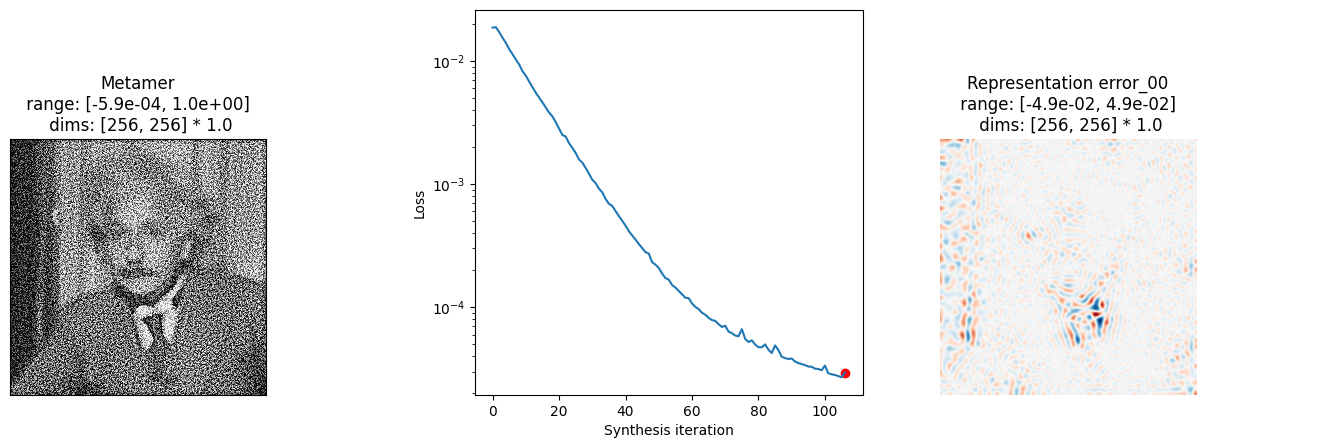

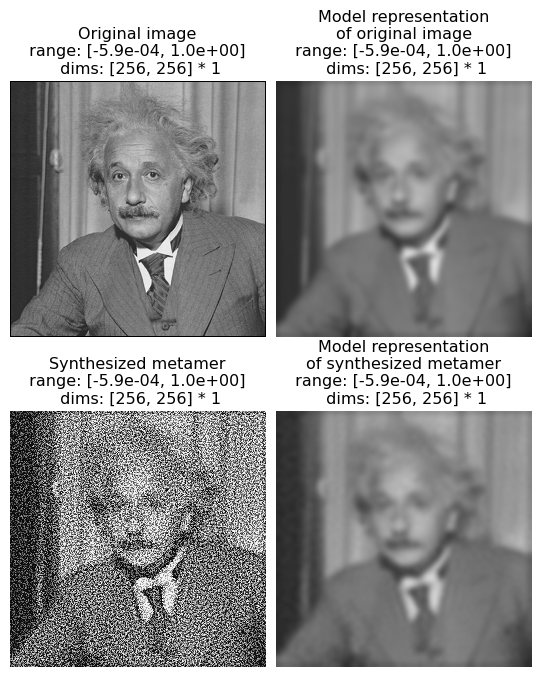

In [4]:
import plenoptic as po
import torch
# needed for the plotting/animating:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['animation.html'] = 'html5'
# use single-threaded ffmpeg for animation writer
plt.rcParams['animation.writer'] = 'ffmpeg'
plt.rcParams['animation.ffmpeg_args'] = ['-threads', '1']

img = po.data.einstein().to(0)
print(img.shape)
# po.imshow(img);

model = po.simul.Gaussian(30)
model.to(0)
# has a forward method:
print( isinstance(model, torch.nn.Module), hasattr(model, "forward"), hasattr(model, "__call__") )

# accepts our 4d image tensor and returns a 4d tensor:
print( model(img).shape )

# this helper function detaches the gradients from learnable parameters
po.tools.remove_grad(model)
# and sets it to eval mode
model.eval()

po.tools.validate.validate_model(model, device=0)

met = po.synth.Metamer(img, model)

met.synthesize(110, store_progress=10)

po.synth.metamer.plot_synthesis_status(met);

fig = po.imshow([img, model(img), met.metamer, model(met.metamer)], 
                col_wrap=2, vrange='auto1',
                title=['Original image', 'Model representation\nof original image',
                       'Synthesized metamer', 'Model representation\nof synthesized metamer']);